In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


### Load dependencies

In [2]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Load Dataset

In [3]:
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

### Data Exploration

In [4]:
frames = [X, y]
dataset = pd.concat(frames, axis=1)

dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [6]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


### Data Cleaning

In [7]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [8]:
new_dataset = dataset.dropna()
new_dataset.shape

(297, 14)

### Data Validation

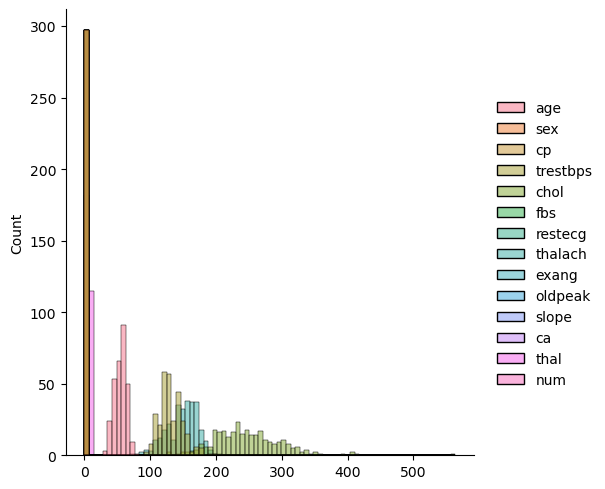

In [9]:
sns.displot(new_dataset)

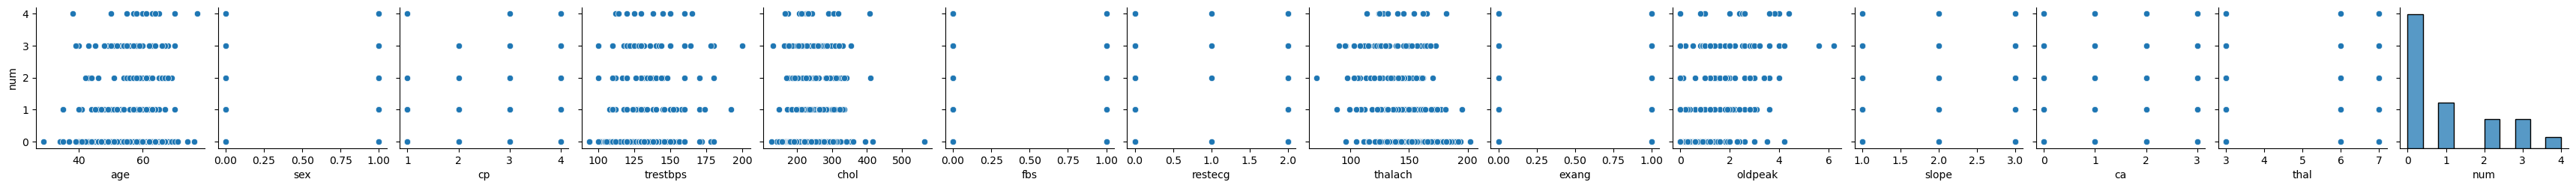

In [10]:
sns.pairplot(new_dataset, y_vars=['num'])

### Split Features and Target

In [11]:
X = new_dataset.iloc[:, :-1]
y = new_dataset.iloc[:, -1]

### Preprocessing

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

col_names = X.columns.values

scaler = StandardScaler()
X = scaler.fit_transform(X)

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

print(col_names)

['age' 'sex' 'cp' 'trestbps' 'chol' 'fbs' 'restecg' 'thalach' 'exang'
 'oldpeak' 'slope' 'ca' 'thal']


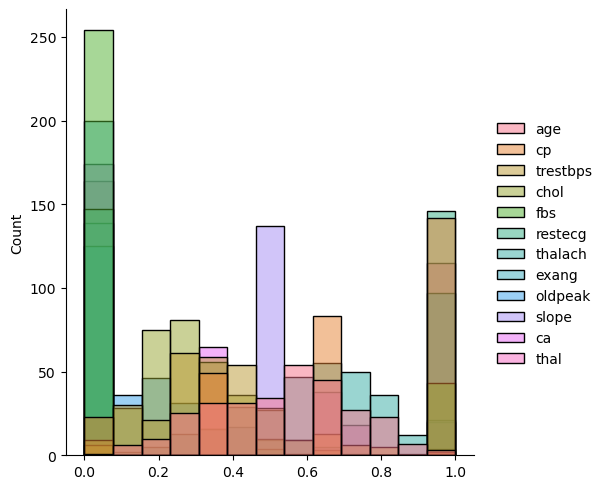

In [13]:
X = pd.DataFrame(X, columns=col_names)
X = X.drop(labels=['sex'], axis=1)
sns.displot(X)

### Split Train and Test Dataset

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=True)

X_train.head()

X_train.isna().sum()

age         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

### Initialize Classification Model

In [15]:
from sklearn.neighbors import  RadiusNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

knn = RadiusNeighborsClassifier(radius=1.0)
knn.fit(X_train, y_train)

ada = AdaBoostClassifier(n_estimators=50, algorithm="SAMME")
ada.fit(X_train, y_train)

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)


DecisionTreeClassifier()

### Test Model

In [16]:
knn_test_pred = knn.predict(X_test)
knn_train_pred = knn.predict(X_train)

ada_test_pred = ada.predict(X_test)
ada_train_pred = ada.predict(X_train)

dtc_test_pred = dtc.predict(X_test)
dtc_train_pred = dtc.predict(X_train)

### Model Evaluation

#### Confusion Matrix

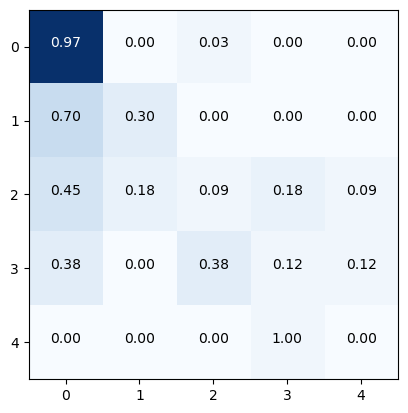

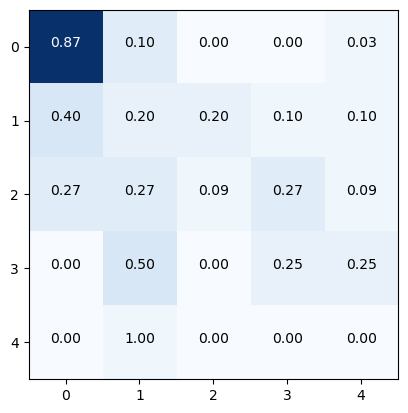

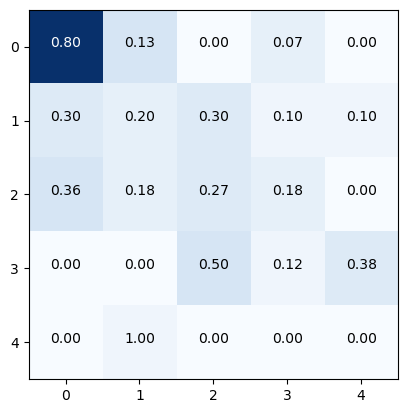

In [17]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, knn_test_pred)
plt.imshow(conf_matrix, cmap=plt.cm.Blues, interpolation='nearest')

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, f'{conf_matrix[i, j] / np.sum(conf_matrix[i]):.2f}',
            horizontalalignment='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')

plt.show()

conf_matrix = confusion_matrix(y_test, ada_test_pred)
plt.imshow(conf_matrix, cmap=plt.cm.Blues, interpolation='nearest')

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, f'{conf_matrix[i, j] / np.sum(conf_matrix[i]):.2f}',
            horizontalalignment='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')

plt.show()

conf_matrix = confusion_matrix(y_test, dtc_test_pred)
plt.imshow(conf_matrix, cmap=plt.cm.Blues, interpolation='nearest')

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, f'{conf_matrix[i, j] / np.sum(conf_matrix[i]):.2f}',
            horizontalalignment='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')

plt.show()

#### Precision - Recall Curve

In [18]:
from sklearn.metrics import classification_report, accuracy_score

report = classification_report(y_test, knn_test_pred)
print("Classification Report: KNN",)
print (report)
accuracy = accuracy_score(y_test,knn_test_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, ada_test_pred)
print("Classification Report: ADABoost",)
print (report)
accuracy = accuracy_score(y_test,ada_test_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, dtc_test_pred)
print("Classification Report: Decison Tree",)
print (report)
accuracy = accuracy_score(y_test,dtc_test_pred)
print("Accuracy:", accuracy)

Classification Report: KNN
              precision    recall  f1-score   support

           0       0.66      0.97      0.78        30
           1       0.60      0.30      0.40        10
           2       0.20      0.09      0.12        11
           3       0.25      0.12      0.17         8
           4       0.00      0.00      0.00         1

    accuracy                           0.57        60
   macro avg       0.34      0.30      0.30        60
weighted avg       0.50      0.57      0.50        60

Accuracy: 0.5666666666666667
Classification Report: ADABoost
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        30
           1       0.15      0.20      0.17        10
           2       0.33      0.09      0.14        11
           3       0.33      0.25      0.29         8
           4       0.00      0.00      0.00         1

    accuracy                           0.52        60
   macro avg       0.32      0.28      0.29